   age         job  marital  education default  balance housing loan  contact  \
0   58  management  married   tertiary      no     2143     yes   no  unknown   
1   44  technician   single  secondary      no       29     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome   y  
0    5   may       261         1     -1         0  unknown  no  
1    5   may       151         1     -1         0  unknown  no  
Summary Statistics:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.00000

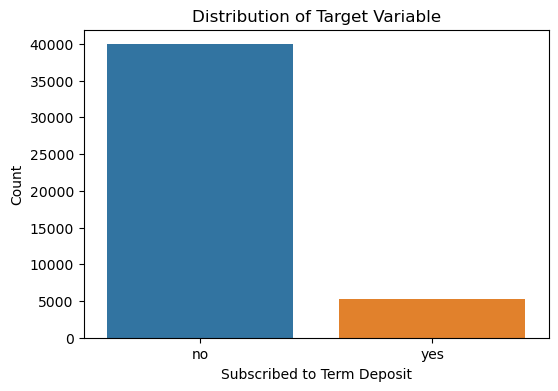

C:\Users\grish\AppData\Local\Temp\ipykernel_9012\3739510331.py:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")


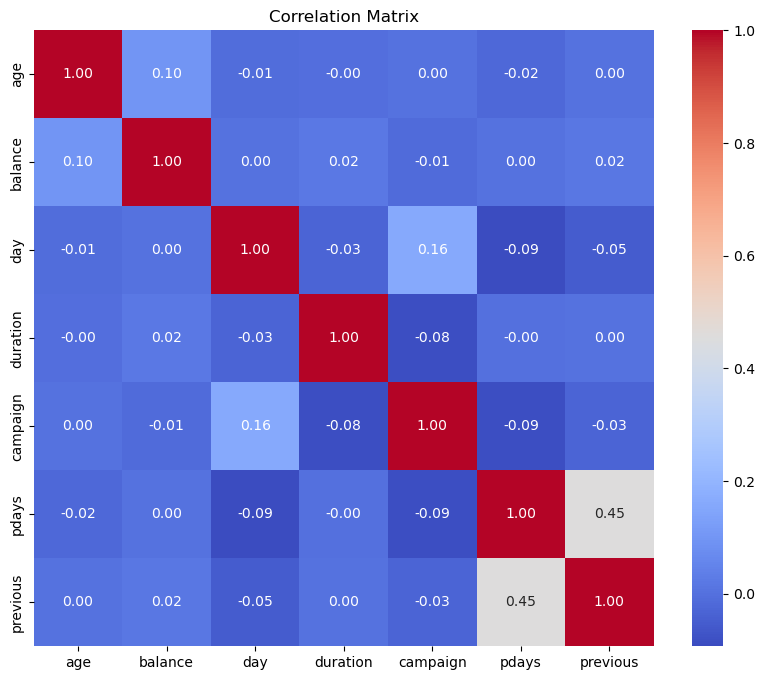

C:\Users\grish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy: 0.9

classification_report:
              precision    recall  f1-score   support

          no       0.92      0.97      0.95      7952
         yes       0.66      0.36      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043


Confusion Matrix:
[[7753  199]
 [ 700  391]]

Coefficients:
               Feature  Coefficient
7209         month_mar     1.648728
7216  poutcome_success     1.337043
7212         month_oct     0.918397
7213         month_sep     0.917124
14         job_student     0.452762
...                ...          ...
7217  poutcome_unknown    -0.829371
7207         month_jul    -0.972568
7211         month_nov    -0.975992
7201   contact_unknown    -1.447305
7206         month_jan    -1.459674

[7218 rows x 2 columns]


In [22]:
## Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load the dataset
data = pd.read_csv("C:/Users/grish/Downloads/Assignments (1)/Assignments/Logistic Regresssion_Project7/4. Logistic Regresssion/bank-full.csv",sep=';')
print(data.head(2)) 

## Exploratory Data Analysis (EDA)

## Summary statistics
print("Summary Statistics:")
print(data.describe())

## Distrubition of the target variable
print("\nDistribution of Target Variable:")
print(data['y'].value_counts())

##Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='y',data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.show()

## Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Convert categorical variables into dummy variables
data = pd.get_dummies(data, columns=['job','marital','education','default','balance','housing','loan','contact' ,'month', 'poutcome'])

## Model Selection and Training

# Split data into features and target variable
X = data.drop(columns=['y'])
y = data['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Model Evaluation

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", round(accuracy, 2))

# Classification report
print("\nclassification_report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print coefficients
print("\nCoefficients:")
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": log_reg.coef_[0]})
print(coefficients.sort_values(by='Coefficient', ascending=False))